In [1]:
import pandas as pd
import seaborn as sns

In [2]:
objects = pd.read_csv('fixed_dataset/objects.csv')
print(objects.info())

/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_24397/953361758.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('fixed_dataset/objects.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462647 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [3]:
objects.groupby(by='entity_type', as_index='False')['id'].nunique('id')

entity_type
Company         196553
FinancialOrg     11652
Person          226708
Product          27738
Name: id, dtype: int64

## Get Companies

In [4]:
companies = objects[
    (objects['entity_type'] == 'Company')
]
companies = companies[~(
   companies['category_code'].isnull() |
   companies['country_code'].isnull() | 
   companies['founded_at'].isnull()
)]
companies['founded_at_year'] = pd.to_datetime(companies['founded_at']).apply(lambda x: x.year)



companies.head()


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,founded_at_year
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,2005
5,c:10002,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,...,0,0.0,NaN,NaN,0,2,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,2007
6,c:10003,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,...,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,2008
12,c:10009,Company,10009,NaN,dimension5 labs,dimension5 labs,/company/dimension5-labs,advertising,operating,2008-08-01,...,0,0.0,2008-08-22,2008-08-22,1,2,NaN,2008-08-24 21:54:55,2008-12-21 17:21:53,2008
13,c:1001,Company,1001,NaN,FriendFeed,friendfeed,/company/friendfeed,web,acquired,2007-10-01,...,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15,2007


In [5]:
objects['entity_type'].unique()

array(['Company', 'FinancialOrg', 'Person', 'Product'], dtype=object)

## Get funding rounds after 2000

In [6]:
funding_rounds = pd.read_csv('fixed_dataset/funding_rounds.csv')
funding_rounds = funding_rounds[~funding_rounds['funded_at'].isna() & ~funding_rounds['object_id'].isna()]
funding_rounds.reset_index(inplace=True)
funding_rounds['funded_at_year'] = pd.to_datetime(funding_rounds['funded_at']).apply(lambda x: int(x.year))
print(funding_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52382 entries, 0 to 52381
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     52382 non-null  int64  
 1   id                        52382 non-null  int64  
 2   funding_round_id          52382 non-null  int64  
 3   object_id                 52382 non-null  object 
 4   funded_at                 52382 non-null  object 
 5   funding_round_type        52382 non-null  object 
 6   funding_round_code        52382 non-null  object 
 7   raised_amount_usd         52382 non-null  float64
 8   raised_amount             52382 non-null  float64
 9   raised_currency_code      49492 non-null  object 
 10  pre_money_valuation_usd   52382 non-null  float64
 11  pre_money_valuation       52382 non-null  float64
 12  pre_money_currency_code   26813 non-null  object 
 13  post_money_valuation_usd  52382 non-null  float64
 14  post_m

In [7]:
funding_rounds.head()

,index,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,...,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at,funded_at_year
0,0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,...,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29,2006
1,1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,...,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23,2004
2,2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,...,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23,2005
3,3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,...,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24,2006
4,4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,...,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12,2006


In [8]:
funding_rounds['funding_round_type'].unique()

array(['series-b', 'angel', 'series-a', 'series-c+', 'venture', 'other',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

In [9]:
obj_rounds = pd.merge(left=objects, right=funding_rounds, left_on='id', right_on='object_id')
obj_rounds.columns
# obj_rounds.groupby(by='entity_type', as_index='False')['id'].nunique('id')

Index(['id_x', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by_x',
       'created_at_x', 'updated_at_x', 'index', 'id_y', 'funding_round_id',
       'object_id', 'funded_at', 'funding_round_type', 'funding_round_code',
       'raised_amount_usd', 'raised_amount', 'raised_currency_code',
       'pre_money_valuation_usd', 'pre_money_valuation',
       'pre_money_currency_code', 'post_money_valuation_usd',
  

In [10]:
obj_rounds['country_code'].nunique()

118

In [11]:
bottom = obj_rounds['raised_amount_usd'].quantile(q=0.25)
top = obj_rounds['raised_amount_usd'].quantile(q=0.75)
iqr = obj_rounds[(obj_rounds['raised_amount_usd'] >= bottom) & (obj_rounds['raised_amount_usd'] <= top)]
len(iqr)

26314

In [12]:
print(len(obj_rounds
          ))

52382


In [13]:
leisure = ['games_video', 'photo_video', 'social', 'hospitality', 'sports', 'fashion', 'messaging', 'music']
bizsupport = ['network_hosting', 'advertising', 'enterprise', 'consulting', 'analytics', 'public_relations', 'security', 'legal']
building = ['cleantech', 'manufacturing', 'semiconductor', 'automotive', 'real_eastate', 'nanotech']
petcare = ['pets']
travel = ['travel', 'transportation']
health = ['health', 'medical', 'biotech']
other = ['web', 'other', 'mobile', 'software', 'finance', 'education', 'ecommerce', 'search', 'hardware', 'news', 'government', 'nonprofit', 'local',]

In [14]:
# @udf(returnType=StringType())
# def map_category_code(category_code):
#     if category_code in leisure:
#         return 'leisure'
#     elif category_code in bizsupport:
#         return 'bizsupport'
#     elif category_code in building:
#         return 'building'
#     elif category_code in petcare:
#         return 'petcare'
#     elif category_code in travel:
#         return 'travel'
#     elif category_code in health:
#         return 'health'
#     else:
#         return 'other'


In [15]:
Africa = ['AGO', 'BDI', 'BEN', 'BWA', 'CIV', 'CMR', 'DZA', 'EGY', 'ETH', 'GHA', 'GIN', 'KEN', 'LSO', 'MAR', 'MDG', 'MUS', 'NAM', 'NER','NGA', 'REU','RWA', 'SDN','SEN', 'SLE', 'SOM','SWZ', 'SYC', 'TUN', 'TZA', 'UGA', 'ZAF', 'ZMB', 'ZWE']
Asia = ['AFG', 'ARE', 'BGD', 'BHR', 'BRN', 'CHN', 'HKG', 'IDN', 'IND', 'IOT', 'IRN', 'IRQ', 'ISR','JOR', 'JPN', 'KAZ', 'KGZ', 'KHM', 'KOR', 'KWT','LAO', 'LBN', 'LKA', 'MAC', 'MDV', 'MMR', 'MYS', 'NPL', 'OMN', 'PAK', 'PCN','PHL','PRK','PST', 'QAT', 'SAU', 'SGP','SYR', 'THA', 'TJK', 'TWN', 'UZB', 'VNM', 'YEM']
Europe = ['AIA', 'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BGR','BIH', 'BLR', 'CHE', 'CYP', 'CZE', 'DEU', 'DNK','ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GEO', 'GIB', 'GLB', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ITA', 'LIE', 'LTU','LUX', 'LVA', 'MCO', 'MDA', 'MKD', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROM', 'RUS', 'SMR', 'SVK', 'SVN','SWE', 'TUR', 'UKR']
North_America = ['ATG', 'BHS','BLZ', 'BMU', 'BRB', 'CAN', 'CRI','CUB','CYM', 'DMA', 'GRD', 'GTM', 'HND', 'HTI', 'JAM', 'MEX', 'MTQ', 'PAN', 'PRI', 'SLV', 'UMI','USA', 'VGB', 'VIR']
South_America = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'DOM', 'ECU', 'NIC', 'PER', 'PRY', 'SUR', 'TTO', 'URY','VEN', 'VCT']
Other = ['ANT', 'ARA', 'AUS', 'CSS', 'FST', 'HMI','NCL', 'NFK','NRU', 'NZL']

In [16]:
# @udf(returnType=StringType())
# def map_country(country_code):
#     if country_code in Africa:
#         return 'Africa'
#     elif country_code in Asia:
#         return 'Asia'
#     elif country_code in Europe:
#         return 'Europe'
#     elif country_code in North_America:
#         return 'North_America'
#     elif country_code in South_America:
#         return 'South_America'
#     else:
#         return 'Other'
    

In [17]:
no_raised_money = obj_rounds[obj_rounds['raised_amount_usd'] <= 0]
print(no_raised_money.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5816 entries, 4 to 52353
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_x                      5816 non-null   object 
 1   entity_type               5816 non-null   object 
 2   entity_id                 5816 non-null   int64  
 3   parent_id                 0 non-null      object 
 4   name                      5816 non-null   object 
 5   normalized_name           5816 non-null   object 
 6   permalink                 5816 non-null   object 
 7   category_code             5559 non-null   object 
 8   status                    5816 non-null   object 
 9   founded_at                4531 non-null   object 
 10  closed_at                 377 non-null    object 
 11  domain                    5644 non-null   object 
 12  homepage_url              5644 non-null   object 
 13  twitter_username          4116 non-null   object 
 14  logo_url    

In [18]:
no_raised_money['raised_currency_code'].unique()

array([nan, 'USD', 'GBP', 'EUR', 'CAD', 'JPY', 'SEK', 'AUD', 'NIS'],
      dtype=object)

In [19]:
len(no_raised_money[no_raised_money['raised_amount'].isna()])

0

In [20]:
5816 / 52382

0.11103050666259402

In [21]:
funding_rounds_after_2000 = funding_rounds[funding_rounds['funded_at_year'] > 2000].copy()
funding_rounds_after_2000['raised_amount_mln_usd'] = funding_rounds_after_2000['raised_amount_usd'].apply(lambda x: round(x / 1e6, 2))

In [22]:
funding_rounds_after_2000['raised_amount_mln_usd'].head()

0     8.5
1     0.5
2    12.7
3    27.5
4    10.5
Name: raised_amount_mln_usd, dtype: float64

## Get info about employees

In [23]:
relationships = pd.read_csv('fixed_dataset/relationships.csv')
print(relationships.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400588 entries, 0 to 400587
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      400588 non-null  int64 
 1   relationship_id         400588 non-null  int64 
 2   person_object_id        400588 non-null  object
 3   relationship_object_id  400588 non-null  object
 4   start_at                206257 non-null  object
 5   end_at                  100593 non-null  object
 6   is_past                 400588 non-null  int64 
 7   sequence                400588 non-null  int64 
 8   title                   387376 non-null  object
 9   created_at              400588 non-null  object
 10  updated_at              400588 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.6+ MB
None


In [24]:
degrees = pd.read_csv('fixed_dataset/degrees.csv')
print(degrees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109056 entries, 0 to 109055
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109056 non-null  int64 
 1   object_id     109056 non-null  object
 2   degree_type   97883 non-null   object
 3   subject       80890 non-null   object
 4   institution   109002 non-null  object
 5   graduated_at  57691 non-null   object
 6   created_at    109056 non-null  object
 7   updated_at    109056 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.7+ MB
None


In [25]:
top_degrees = degrees['degree_type'].value_counts().head(20).index.tolist()


In [26]:
BA = [
    "BS",
    "BA",
    "BBA",
    "BE",
    "BTECH",
    "BCOM",
    "BFA",
    "Bachelor\x92s Degree",
    "BENG",
    "Bachelor of Arts (B.A.)",
    "BASC",
    "Bachelor of Science (B.S.)",
    "Bachelor\x92s degree",
    "BSME",
    "B.S.",
    "Business Administration",
    "Bachelor of Science (BS)",
    "Bachelors",
    "Bachelor of Science",
    "BSc",
]

In [27]:
def degree_mapping(degree_type):
    if degree_type in ['BS', 'BA', 'BBA', 'BFA', 'BCOM', 'Bachelor of Arts (B.A.)', 'Bachelor of Science (B.S.)']:
        return 'Balcheor'
    elif degree_type in ['MBA', 'MS', 'MA', 'MD','MSE', 'Master Degree', 'Masters']:
        pass

In [28]:
top_degrees

['BS',
 'MBA',
 'BA',
 'MS',
 'PhD',
 'JD',
 'MA',
 'Degree',
 'BBA',
 'BE',
 'MD',
 'BTECH',
 'Diploma',
 'BCOM',
 'BFA',
 'LLB',
 'MSE',
 'MENG',
 'Bachelor\x92s Degree',
 'BENG']

In [29]:
top_balcheors = degrees[degrees['degree_type'].notna() & degrees['degree_type'].str.startswith('B')]['degree_type'].value_counts().head(20).index.tolist()
top_balcheors

['BS',
 'BA',
 'BBA',
 'BE',
 'BTECH',
 'BCOM',
 'BFA',
 'Bachelor\x92s Degree',
 'BENG',
 'Bachelor of Arts (B.A.)',
 'BASC',
 'Bachelor of Science (B.S.)',
 'Bachelor\x92s degree',
 'BSME',
 'B.S.',
 'Business Administration',
 'Bachelor of Science (BS)',
 'Bachelors',
 'Bachelor of Science',
 'BSc']

In [30]:
top_masters = degrees[degrees['degree_type'].notna() & degrees['degree_type'].str.startswith('M')]['degree_type'].value_counts().head(20).index.tolist()
top_masters

['MBA',
 'MS',
 'MA',
 'MD',
 'MSE',
 'MENG',
 'Master Degree',
 'MPHIL',
 'Masters',
 'Master of Business Administratio',
 'MPA',
 'Master\x92s Degree',
 'MPH',
 'MSc',
 'ME',
 'MED',
 'Master of Engineering',
 'MPP',
 'MCA',
 'Marketing']

### Number of companies founded from 2000 by categories

In [31]:
companies_after_2000 = companies[companies['founded_at_year'] > 2000]
print(companies_after_2000.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53265 entries, 0 to 196552
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   53265 non-null  object 
 1   entity_type          53265 non-null  object 
 2   entity_id            53265 non-null  int64  
 3   parent_id            0 non-null      object 
 4   name                 53265 non-null  object 
 5   normalized_name      53265 non-null  object 
 6   permalink            53265 non-null  object 
 7   category_code        53265 non-null  object 
 8   status               53265 non-null  object 
 9   founded_at           53265 non-null  object 
 10  closed_at            1535 non-null   object 
 11  domain               52492 non-null  object 
 12  homepage_url         52492 non-null  object 
 13  twitter_username     39929 non-null  object 
 14  logo_url             48815 non-null  object 
 15  logo_width           53265 non-null  int

In [32]:
top_categories = ['software', 'web', 'ecommerce', 'mobile', 'advertising']

In [33]:
companies_after_2000_by_category = companies_after_2000.groupby(by=['category_code', 'founded_at_year'], as_index=False)['id'].nunique()
companies_after_2000_by_category['cnt_companies'] = companies_after_2000_by_category['id']
companies_after_2000_by_category.head()

,category_code,founded_at_year,id,cnt_companies
0,advertising,2001,95,95
1,advertising,2002,69,69
2,advertising,2003,117,117
3,advertising,2004,112,112
4,advertising,2005,152,152


In [34]:
companies_after_2000_by_top_category = companies_after_2000_by_category[companies_after_2000_by_category['category_code'].isin(top_categories)]

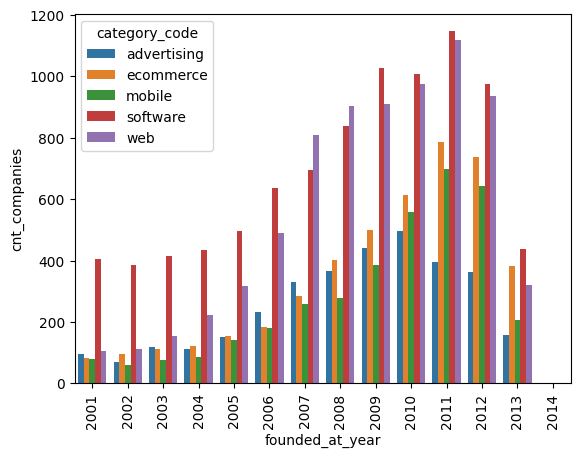

In [35]:
p = sns.barplot(x='founded_at_year', y='cnt_companies', data=companies_after_2000_by_top_category, hue='category_code')
for item in p.get_xticklabels():
    item.set_rotation(90)


### Scatter plot of the relation between the biggest amont of funds between the time period from the founding of the company to the date of the round

In [36]:
max_raised_amount = funding_rounds_after_2000.groupby('object_id').apply(lambda x: x.loc[x['raised_amount_mln_usd'].idxmax()])
max_raised_amount = max_raised_amount[['object_id', 'raised_amount_mln_usd', 'funded_at_year']]
max_raised_amount.reset_index(drop=True, inplace=True)
max_raised_amount.head()


/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_24397/3647154297.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_raised_amount = funding_rounds_after_2000.groupby('object_id').apply(lambda x: x.loc[x['raised_amount_mln_usd'].idxmax()])


,object_id,raised_amount_mln_usd,funded_at_year
0,c:1,25.0,2008
1,c:1001,5.0,2008
2,c:10014,0.0,2008
3,c:10015,43.0,2013
4,c:100155,6.5,2011


In [37]:
max_raised_amount_by_company = pd.merge(left=companies, right=max_raised_amount, left_on='id', right_on='object_id')
print(max_raised_amount_by_company.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22674 entries, 0 to 22673
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22674 non-null  object 
 1   entity_type            22674 non-null  object 
 2   entity_id              22674 non-null  int64  
 3   parent_id              0 non-null      object 
 4   name                   22674 non-null  object 
 5   normalized_name        22674 non-null  object 
 6   permalink              22674 non-null  object 
 7   category_code          22674 non-null  object 
 8   status                 22674 non-null  object 
 9   founded_at             22674 non-null  object 
 10  closed_at              1345 non-null   object 
 11  domain                 22042 non-null  object 
 12  homepage_url           22042 non-null  object 
 13  twitter_username       15930 non-null  object 
 14  logo_url               21483 non-null  object 
 15  lo

In [38]:
max_raised_amount_by_company['time_gap'] = max_raised_amount_by_company['funded_at_year'] - max_raised_amount_by_company['founded_at_year']
max_raised_amount_by_company = max_raised_amount_by_company[['object_id', 'raised_amount_mln_usd', 'funded_at_year', 'founded_at_year', 'time_gap']]
max_raised_amount_by_company.head()

,object_id,raised_amount_mln_usd,funded_at_year,founded_at_year,time_gap
0,c:1,25.0,2008,2005,3
1,c:1001,5.0,2008,2007,1
2,c:10014,0.0,2008,2008,0
3,c:10015,43.0,2013,2007,6
4,c:100155,6.5,2011,2003,8


Text(0.5, 0, 'time gap between founding and biggest round')

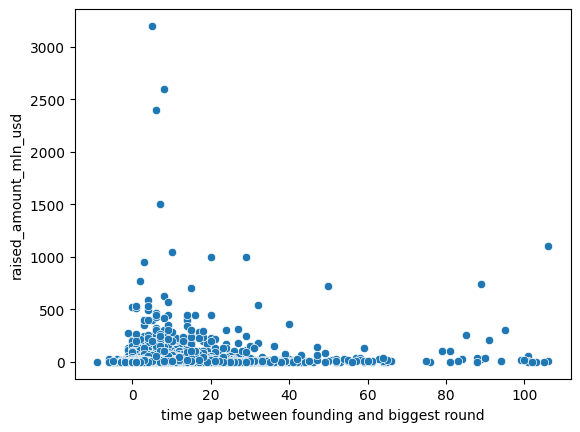

In [39]:
p = sns.scatterplot(data=max_raised_amount_by_company, x='time_gap', y='raised_amount_mln_usd')
p.set_xlabel('time gap between founding and biggest round')

### Get the info about degree of employees of top companies

In [40]:
top_companies_by_usd = max_raised_amount_by_company.sort_values(by='raised_amount_mln_usd', ascending=False).head(100)

In [41]:
top_companies_by_usd.head()

,object_id,raised_amount_mln_usd,funded_at_year,founded_at_year,time_gap
746,c:13219,3200.0,2008,2003,5
9963,c:242735,2600.0,2013,2005,8
19778,c:64365,2400.0,2013,2007,6
17712,c:5,1500.0,2011,2004,7
20538,c:7060,1100.0,2012,1906,106


## Get info about raised money among funding round types

In [42]:
funding_rounds_after_2000.head()

,index,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,...,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at,funded_at_year,raised_amount_mln_usd
0,0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,...,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29,2006,8.5
1,1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,...,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23,2004,0.5
2,2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,...,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23,2005,12.7
3,3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,...,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24,2006,27.5
4,4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,...,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12,2006,10.5


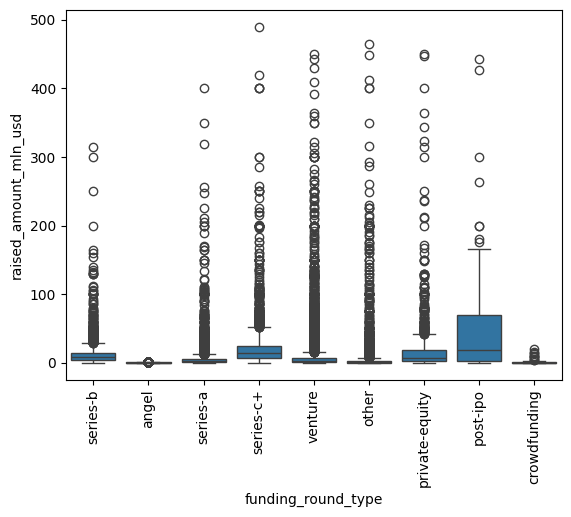

In [43]:
p = sns.boxplot(data=funding_rounds_after_2000[funding_rounds_after_2000['raised_amount_mln_usd'] < 500], x='funding_round_type', y='raised_amount_mln_usd')
for item in p.get_xticklabels():
    item.set_rotation(90)

## Get info about popularity of different funding round types by years

In [44]:
funding_round_type_per_year = funding_rounds_after_2000.groupby(['funded_at_year', 'funding_round_type'], as_index=False).agg({'funding_round_id': 'nunique'})
funding_round_type_per_year.head()

,funded_at_year,funding_round_type,funding_round_id
0,2001,angel,21
1,2001,other,5
2,2001,private-equity,1
3,2001,series-a,29
4,2001,series-b,13


Text(0, 0.5, 'number of funding rounds')

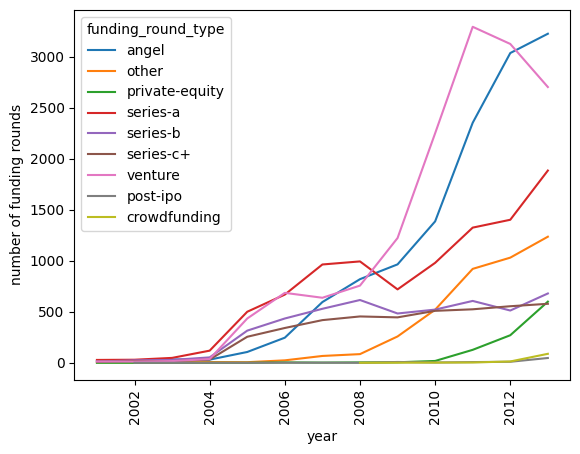

In [45]:
p = sns.lineplot(x='funded_at_year', y='funding_round_id', data=funding_round_type_per_year, hue='funding_round_type')
for item in p.get_xticklabels():
    item.set_rotation(90)
p.set_xlabel('year')
p.set_ylabel('number of funding rounds')


## Get avg raised money by continent

In [46]:
def map_country(country_code):
    if country_code in Africa:
        return 'Africa'
    elif country_code in Asia:
        return 'Asia'
    elif country_code in Europe:
        return 'Europe'
    elif country_code in North_America:
        return 'North_America'
    elif country_code in South_America:
        return 'South_America'
    else:
        return 'Other'

In [49]:
funding_rounds_after_2000.columns

Index(['index', 'id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at', 'funded_at_year', 'raised_amount_mln_usd'],
      dtype='object')

In [50]:
rounds_and_companies = pd.merge(left=companies_after_2000, right=funding_rounds_after_2000, left_on='id', right_on='object_id')
len(rounds_and_companies)

35989

In [52]:
rounds_and_companies.columns

Index(['id_x', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by_x',
       'created_at_x', 'updated_at_x', 'founded_at_year', 'index', 'id_y',
       'funding_round_id', 'object_id', 'funded_at', 'funding_round_type',
       'funding_round_code', 'raised_amount_usd', 'raised_amount',
       'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'pos

In [51]:
rounds_and_companies['continent'] = rounds_and_companies['country_code'].apply(lambda x: map_country(x))
rounds_and_companies[['continent', 'country_code']].head()

,continent,country_code
0,North_America,USA
1,North_America,USA
2,North_America,USA
3,North_America,USA
4,North_America,USA


In [60]:
avg_raised_money_by_country = rounds_and_companies.groupby(by=['continent', 'funded_at_year'], as_index=False).agg({'raised_amount_mln_usd': 'sum', 'object_id': 'nunique'})
avg_raised_money_by_country.head()

,continent,funded_at_year,raised_amount_mln_usd,object_id
0,Africa,2005,10.00,1
1,Africa,2007,4.48,3
2,Africa,2008,1.18,7
3,Africa,2009,32.86,11
4,Africa,2010,29.37,14


In [61]:
avg_raised_money_by_country['avg_raised_money_mln_usd'] = avg_raised_money_by_country['raised_amount_mln_usd'] / avg_raised_money_by_country['object_id']

In [62]:
print(avg_raised_money_by_country.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   continent                 68 non-null     object 
 1   funded_at_year            68 non-null     int64  
 2   raised_amount_mln_usd     68 non-null     float64
 3   object_id                 68 non-null     int64  
 4   avg_raised_money_mln_usd  68 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.8+ KB
None


In [63]:
avg_raised_money_by_country.head()

,continent,funded_at_year,raised_amount_mln_usd,object_id,avg_raised_money_mln_usd
0,Africa,2005,10.00,1,10.000000
1,Africa,2007,4.48,3,1.493333
2,Africa,2008,1.18,7,0.168571
3,Africa,2009,32.86,11,2.987273
4,Africa,2010,29.37,14,2.097857


Text(0, 0.5, 'avg raised money in mln usd')

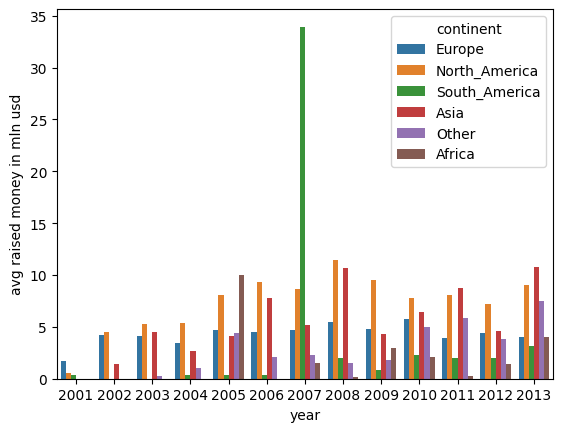

In [66]:
p = sns.barplot(data=avg_raised_money_by_country, x='funded_at_year', y='avg_raised_money_mln_usd', hue='continent')
# for item in p.get_xticklabels():
#     item.set_rotation(90)
p.set_xlabel('year')
p.set_ylabel('avg raised money in mln usd')
